In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
holidays=pd.read_csv("holidays_events.csv")
holidays[0:5]

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [3]:
items=pd.read_csv("items.csv")
items[0:5]

,item_nbr,family,class,perishable
0,96995,GROCERY I,1093,0
1,99197,GROCERY I,1067,0
2,103501,CLEANING,3008,0
3,103520,GROCERY I,1028,0
4,103665,BREAD/BAKERY,2712,1


In [4]:
oil=pd.read_csv("oil.csv", index_col=0)
oil[0:5]

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [5]:
stores=pd.read_csv("stores.csv")
stores[0:5]

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [6]:
#data_types={'id': 'int_', 'item_nbr': 'int_', 'store_nbr:': 'int_', 'onpromotion': 'bool_'}
#train=pd.read_csv("train.csv", dtype=data_types, index_col=0)

In [7]:
#train[0:5]
#there is no information in the training set about which items were on promotion
#test set does contains information about each item for whether on promotion

In [8]:
#store_mask2=train['store_nbr'].isin([25, 42, 54])
#train=train[store_mask2]
#train.to_csv('store25_42_54.csv')
train=pd.read_csv('train_70.csv')
train.head()

,Unnamed: 0,id,date,store_nbr,item_nbr,onpromotion
0,118232,127698406,2017-08-26,25,913363,False
1,14909,125804524,2017-08-17,25,1968938,False
2,74388,126921174,2017-08-22,42,305074,False
3,86743,127132480,2017-08-23,42,765520,False
4,8320,125704311,2017-08-16,54,463458,False


In [9]:
transactions=pd.read_csv("transactions.csv")
transactions['date']=pd.to_datetime(transactions['date'])
transactions[0:5]

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [10]:
#test=pd.read_csv("test.csv", dtype=data_types, index_col=0)
#test[0:5]

In [11]:
#store_mask_test=test['store_nbr'].isin([25, 42, 54])
#test=test[store_mask_test]
#test.to_csv('store25_42_54test.csv')
#test.head()
#len(test)

test=pd.read_csv('test_30.csv')
test.head()

,Unnamed: 0,id,date,store_nbr,item_nbr,onpromotion
0,185562,128865818,2017-08-31,54,1404410,False
1,64678,126712513,2017-08-21,42,1428330,False
2,158611,128398054,2017-08-29,42,1466826,False
3,17288,125869319,2017-08-17,42,1160873,False
4,78445,126968142,2017-08-22,54,401817,False


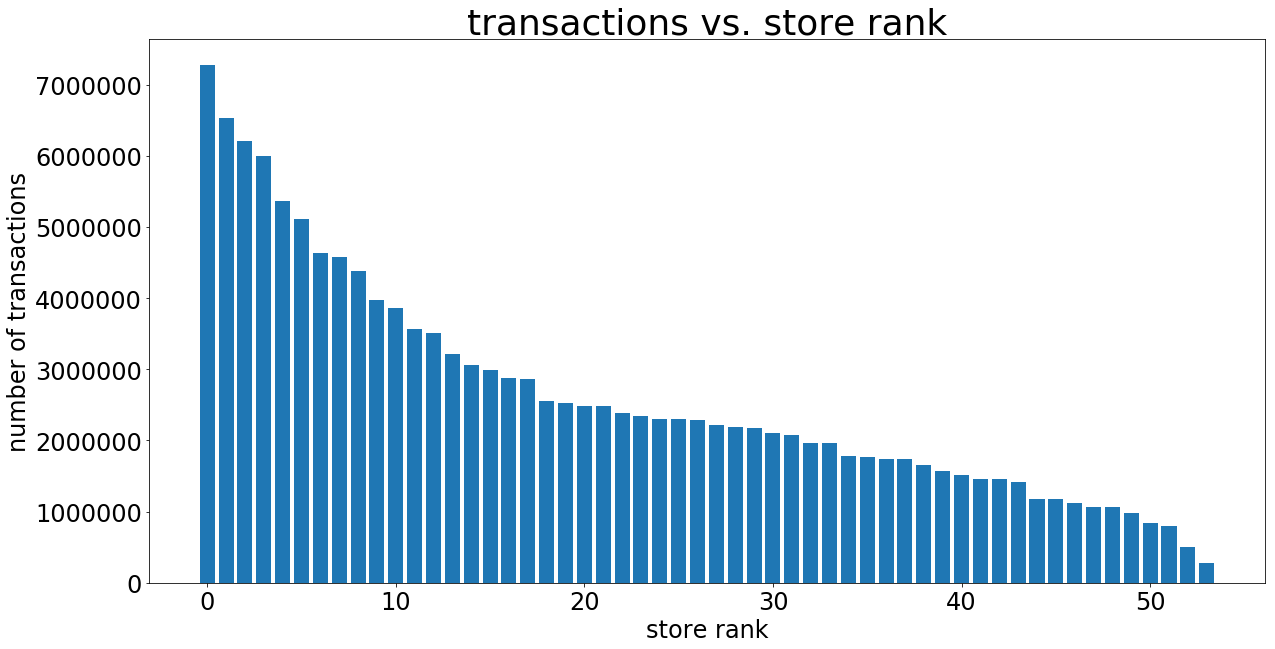

In [12]:
transactions_by_store=transactions.groupby(['store_nbr']).sum()['transactions'].sort_values(ascending=False)
y=transactions_by_store.values
X=range(0,len(y))

fig=plt.figure(figsize=(20,10))

ax=fig.add_subplot(111)

ax.bar(X,y)

ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=16)

ax.set_xlabel('store rank', fontsize=24)
ax.set_ylabel('number of transactions', fontsize=24)
ax.set_title('transactions vs. store rank', fontsize=36)

#display actual store id's rather than rank
#plt.xticks(X,y)


In [13]:
print "There are {} stores.".format(len(transactions_by_store))

There are 54 stores.


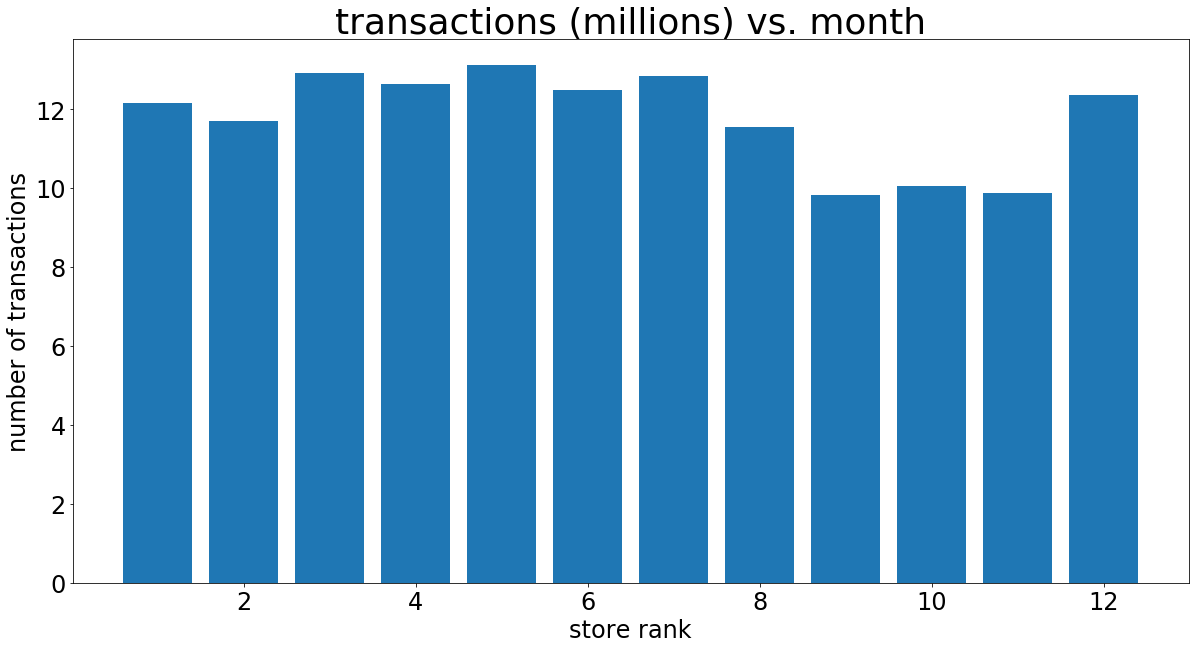

In [14]:
transactions['year']=transactions['date'].dt.year
transactions['month']=transactions['date'].dt.month

transactions_by_month=transactions.groupby(['month']).sum()['transactions']
y=transactions_by_month.values
X=range(1,len(y)+1)

fig=plt.figure(figsize=(20,10))

ax=fig.add_subplot(111)

ax.bar(X,[i/1e6 for i in y])

ax.tick_params(axis='both', which='major', labelsize=24)
ax.tick_params(axis='both', which='minor', labelsize=16)

ax.set_xlabel('store rank', fontsize=24)
ax.set_ylabel('number of transactions', fontsize=24)
ax.set_title('transactions (millions) vs. month', fontsize=36)

In [15]:
train.head()

,Unnamed: 0,id,date,store_nbr,item_nbr,onpromotion
0,118232,127698406,2017-08-26,25,913363,False
1,14909,125804524,2017-08-17,25,1968938,False
2,74388,126921174,2017-08-22,42,305074,False
3,86743,127132480,2017-08-23,42,765520,False
4,8320,125704311,2017-08-16,54,463458,False


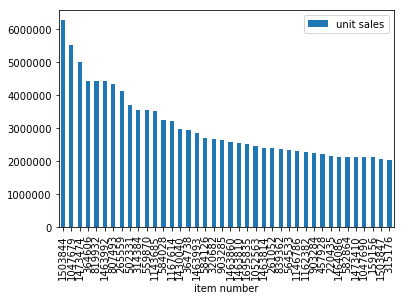

In [16]:
sales_by_item=pd.read_csv('unit sales by item nbr.csv', header=None, index_col=0, names=['item number', 'unit sales'])
sales_by_item_short=sales_by_item[0:40]
sales_by_item_short.plot(kind='bar')

In [17]:
print "There are {} items.".format(len(sales_by_item))

There are 4036 items.


In [18]:
print "training has {} rows.".format(len(train))
train.head()

training has 131073 rows.


,Unnamed: 0,id,date,store_nbr,item_nbr,onpromotion
0,118232,127698406,2017-08-26,25,913363,False
1,14909,125804524,2017-08-17,25,1968938,False
2,74388,126921174,2017-08-22,42,305074,False
3,86743,127132480,2017-08-23,42,765520,False
4,8320,125704311,2017-08-16,54,463458,False


In [19]:
#process training data
train['date']=pd.to_datetime(train['date'])
train['year']=train['date'].dt.year
train['month']=train['date'].dt.month
train['day_of_week']=train['date'].dt.weekday
train['day_of_year']=train['date'].dt.day

#process testing data
test['date']=pd.to_datetime(test['date'])
test['year']=test['date'].dt.year
test['month']=test['date'].dt.month
test['day_of_week']=test['date'].dt.weekday
test['day_of_year']=test['date'].dt.day

In [20]:
print "There are {} rows in the training set.".format(len(train))

There are 131073 rows in the training set.


In [22]:
#sales_by_item=sales_by_item.to_frame()
sales_by_item['item_sales_rank']=sales_by_item['unit sales'].rank()
sales_by_item.head()

,unit sales,item_sales_rank
item number,,
1503844,6.264200e+06,4036.0
1047679,5.512875e+06,4035.0
1473474,4.990323e+06,4034.0
364606,4.416426e+06,4033.0
819932,4.410943e+06,4032.0


In [23]:
train_with_sales=pd.merge(sales_by_item, train, how='inner', left_index=True, right_on='item_nbr')
train_with_sales.head()

,unit sales,item_sales_rank,Unnamed: 0,id,date,store_nbr,item_nbr,onpromotion,year,month,day_of_week,day_of_year
1610,6.264200e+06,4036.0,84606,127067927,2017-08-23,25,1503844,False,2017,8,2,23
2353,6.264200e+06,4036.0,123616,127766206,2017-08-26,42,1503844,False,2017,8,5,26
3910,6.264200e+06,4036.0,14388,125804003,2017-08-17,25,1503844,False,2017,8,3,17
7214,6.264200e+06,4036.0,108012,127489235,2017-08-25,25,1503844,False,2017,8,4,25
9646,6.264200e+06,4036.0,115814,127602364,2017-08-25,54,1503844,False,2017,8,4,25


In [24]:
train_with_sales_items=pd.merge(items, train_with_sales, how='inner', left_on='item_nbr', right_on='item_nbr')
train_with_sales_items.head()

,item_nbr,family,class,perishable,unit sales,item_sales_rank,Unnamed: 0,id,date,store_nbr,onpromotion,year,month,day_of_week,day_of_year
0,96995,GROCERY I,1093,0,10143.0,298.0,70218,126854588,2017-08-22,25,False,2017,8,1,22
1,96995,GROCERY I,1093,0,10143.0,298.0,167743,128606137,2017-08-30,42,False,2017,8,2,30
2,96995,GROCERY I,1093,0,10143.0,298.0,140436,128118512,2017-08-28,25,False,2017,8,0,28
3,96995,GROCERY I,1093,0,10143.0,298.0,171644,128652949,2017-08-30,54,False,2017,8,2,30
4,96995,GROCERY I,1093,0,10143.0,298.0,113129,127599679,2017-08-25,54,False,2017,8,4,25


In [25]:
train_with_sales_items_store=pd.merge(stores, train_with_sales_items, how='inner', left_on='store_nbr', right_on='store_nbr')
train_with_sales_items_store.head()

,store_nbr,city,state,type,cluster,item_nbr,family,class,perishable,unit sales,item_sales_rank,Unnamed: 0,id,date,onpromotion,year,month,day_of_week,day_of_year
0,25,Salinas,Santa Elena,D,1,96995,GROCERY I,1093,0,10143.0,298.0,70218,126854588,2017-08-22,False,2017,8,1,22
1,25,Salinas,Santa Elena,D,1,96995,GROCERY I,1093,0,10143.0,298.0,140436,128118512,2017-08-28,False,2017,8,0,28
2,25,Salinas,Santa Elena,D,1,96995,GROCERY I,1093,0,10143.0,298.0,128733,127907858,2017-08-27,False,2017,8,6,27
3,25,Salinas,Santa Elena,D,1,96995,GROCERY I,1093,0,10143.0,298.0,11703,125801318,2017-08-17,False,2017,8,3,17
4,25,Salinas,Santa Elena,D,1,96995,GROCERY I,1093,0,10143.0,298.0,117030,127697204,2017-08-26,False,2017,8,5,26


In [26]:
oil.index=pd.to_datetime(oil.index)
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [30]:
train_with_sales_items_store.head()
train_joined=train_with_sales_items_store

In [31]:
train_by_date=train_joined.groupby(['date']).sum()
train_by_date.index

DatetimeIndex(['2017-08-16', '2017-08-17', '2017-08-18', '2017-08-19',
               '2017-08-20', '2017-08-21', '2017-08-22', '2017-08-23',
               '2017-08-24', '2017-08-25', '2017-08-26', '2017-08-27',
               '2017-08-28', '2017-08-29', '2017-08-30', '2017-08-31'],
              dtype='datetime64[ns]', name=u'date', freq=None)

In [32]:
print "the range of dates for the oil prices is {} to {}.".format(oil.index.min(), oil.index.max())
print "the range of dates for the test data is {} to {}.".format(train.date.min(), train.date.max())
print "the range of dates for the test data is {} to {}.".format(test.date.min(), test.date.max())

print "the oil price data spans the entire training and test sets, some data is missing for weekends and holidays"

the range of dates for the oil prices is 2013-01-01 00:00:00 to 2017-08-31 00:00:00.
the range of dates for the test data is 2017-08-16 00:00:00 to 2017-08-31 00:00:00.
the range of dates for the test data is 2017-08-16 00:00:00 to 2017-08-31 00:00:00.
the oil price data spans the entire training and test sets, some data is missing for weekends and holidays


In [33]:
#function to interpolate missing oil prices

import datetime
import numpy as np

def find_a_price(x,y):
    sub_price=np.nan
    movement=0
    while np.isnan(sub_price):
        movement += y
        #print movement
        new_date = x + movement*datetime.timedelta(days=1)
        #print new_date
        if new_date in oil.index:
            sub_price=oil.loc[new_date]['dcoilwtico']
    return abs(movement), sub_price

#x=oil.index[1]+datetime.timedelta(days=4)
#find_a_price(x,1)

def get_oil(x):
    if x==oil.index[0]:
        x1=oil.index[1]
        p1=oil.loc[x1]['dcoilwtico']
        x2=oil.index[2]
        p2=oil.loc[x2]['dcoilwtico']
        
        m=p2-p1/int((x2-x1).days)
        
        price=p1+m*int((x-x1).days)

    elif x in oil.index:
        price=oil.loc[x]['dcoilwtico']
        if np.isnan(price):
            back_mov, back_price=find_a_price(x,-1)
            for_mov, for_price=find_a_price(x,1)
            price=float(back_mov)/(back_mov+for_mov)*(for_price-back_price)+back_price
    else:
        back_mov, back_price=find_a_price(x,-1)
        for_mov, for_price=find_a_price(x,1)
        price=float(back_mov)/(back_mov+for_mov)*(for_price-back_price)+back_price
    return price

#x=oil.index[0]+datetime.timedelta(days=0)
#get_oil(x)

In [34]:
#interpolate/use all oil price info for the training data
s1=pd.Series(train_by_date.index)
s2=pd.Series(train_by_date.index.map(get_oil), name='oil price')

all_oil_dates_train=pd.concat([s1,s2], axis=1)

In [35]:
all_oil_dates_train.head()

,date,oil price
0,2017-08-16,46.80
1,2017-08-17,47.07
2,2017-08-18,48.59
3,2017-08-19,48.19
4,2017-08-20,47.79


In [36]:
train_joined=pd.merge(all_oil_dates_train, train_with_sales_items_store, how='inner', left_on='date', right_on='date')
#check that all data is preserved
len(train_joined)-len(train)

-2005

In [37]:
train_joined.head()

,date,oil price,store_nbr,city,state,type,cluster,item_nbr,family,class,perishable,unit sales,item_sales_rank,Unnamed: 0,id,onpromotion,year,month,day_of_week,day_of_year
0,2017-08-16,46.8,25,Salinas,Santa Elena,D,1,99197,GROCERY I,1067,0,17870.0,451.0,1,125590665,False,2017,8,2,16
1,2017-08-16,46.8,25,Salinas,Santa Elena,D,1,103501,CLEANING,3008,0,164753.0,2094.0,2,125590666,False,2017,8,2,16
2,2017-08-16,46.8,25,Salinas,Santa Elena,D,1,103520,GROCERY I,1028,0,201117.0,2442.0,3,125590667,False,2017,8,2,16
3,2017-08-16,46.8,25,Salinas,Santa Elena,D,1,103665,BREAD/BAKERY,2712,1,219669.0,2590.0,4,125590668,False,2017,8,2,16
4,2017-08-16,46.8,25,Salinas,Santa Elena,D,1,105575,GROCERY I,1045,0,865894.0,3819.0,6,125590670,False,2017,8,2,16


In [40]:
#data for EDA graphing
sales_by_day=train_joined.groupby(['day_of_week']).sum()['unit sales'].sort_values(ascending=False)
sales_by_item=train_joined.groupby(['item_nbr']).sum()['unit sales'].sort_values(ascending=False)
sales_by_month=train_joined.groupby(['month']).sum()['unit sales']
sales_by_year=train_joined.groupby(['year']).sum()['unit sales']
sales_by_store=train_joined.groupby(['store_nbr']).sum()['unit sales']

In [39]:
#more data for EDA graphing
sales_by_day=train_joined.groupby(['date']).sum()['unit sales']
sales_by_day=pd.DataFrame(sales_by_day)
oil_and_sales=pd.merge(sales_by_day, all_oil_dates_train,left_index=True, right_on='date')
oil_and_sales.head()

,unit sales,date,oil price
0,2.184090e+09,2017-08-16,46.80
1,2.171043e+09,2017-08-17,47.07
2,2.136198e+09,2017-08-18,48.59
3,2.181564e+09,2017-08-19,48.19
4,2.133398e+09,2017-08-20,47.79


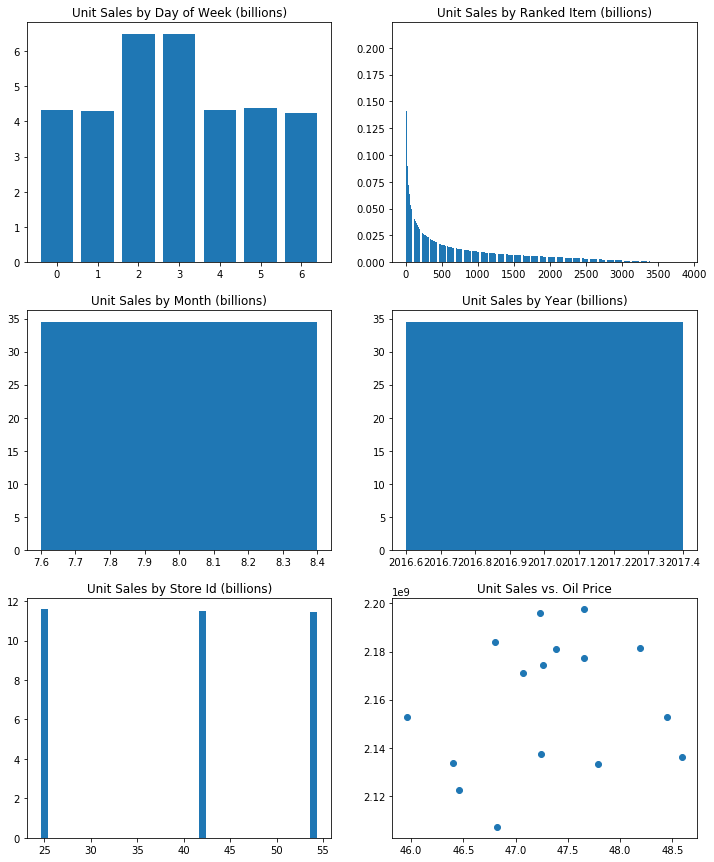

In [41]:
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(12,15))

ax1=fig.add_subplot(321)
ax1.bar(sales_by_day.index, sales_by_day.values/1e9)
ax1.set_title("Unit Sales by Day of Week (billions)")

ax2=fig.add_subplot(322)
ax2.bar(range(0,len(sales_by_item)), sales_by_item.values/1e9)
ax2.set_title("Unit Sales by Ranked Item (billions)")

ax3=fig.add_subplot(323)
ax3.bar(sales_by_month.index, sales_by_month.values/1e9)
ax3.set_title("Unit Sales by Month (billions)")

ax4=fig.add_subplot(324)
ax4.bar(sales_by_year.index, sales_by_year.values/1e9)
ax4.set_title("Unit Sales by Year (billions)")

ax5=fig.add_subplot(325)
ax5.bar(sales_by_store.index, sales_by_store.values/1e9)
ax5.set_title("Unit Sales by Store Id (billions)")

ax6=fig.add_subplot(326)
ax6.scatter(oil_and_sales['oil price'], oil_and_sales['unit sales'])
ax6.set_title("Unit Sales vs. Oil Price")